# Гришин Андрей Валерьевич, ИКБО-11-22.
## Практическая работа 2

# Задание 1
Найти и выгрузить многомерные данные (с большим количеством
признаков – столбцов) с использованием библиотеки pandas

In [16]:
!pip install pandas


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import pandas as pd

url = "https://raw.githubusercontent.com/selva86/datasets/master/Zoo.csv"
df = pd.read_csv(url)

df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
1,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
2,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,fish
3,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
4,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal


# Задание 2
Вывести информацию о данных при помощи методов .info(), .head().
Проверить данные на наличие пустых значений. В случае их наличия
удалить данные строки или интерполировать пропущенные значения.
При необходимости дополнительно предобработать данные для
дальнейшей работы с ними.


In [18]:
df.info()
print("\nПроверка пропусков:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   hair      101 non-null    bool  
 1   feathers  101 non-null    bool  
 2   eggs      101 non-null    bool  
 3   milk      101 non-null    bool  
 4   airborne  101 non-null    bool  
 5   aquatic   101 non-null    bool  
 6   predator  101 non-null    bool  
 7   toothed   101 non-null    bool  
 8   backbone  101 non-null    bool  
 9   breathes  101 non-null    bool  
 10  venomous  101 non-null    bool  
 11  fins      101 non-null    bool  
 12  legs      101 non-null    int64 
 13  tail      101 non-null    bool  
 14  domestic  101 non-null    bool  
 15  catsize   101 non-null    bool  
 16  type      101 non-null    object
dtypes: bool(15), int64(1), object(1)
memory usage: 3.2+ KB

Проверка пропусков:
hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator

# Задание 3
Построить столбчатую диаграмму (.bar) с использованием модуля
graph_objs из библиотеки Plotly со следующими параметрами:

3.1. По оси Х указать дату или название, по оси У указать количественный
показатель.

3.2. Сделать так, чтобы столбец принимал цвет в зависимости от значения
показателя (marker=dict(color=признак, coloraxis="coloraxis")).

3.3. Сделать так, чтобы границы каждого столбца были выделены чёрной
линией с толщиной равной 2.

3.4. Отобразить заголовок диаграммы, разместив его по центру сверху, с
20 размером текста.

3.5. Добавить подписи для осей X и Y с размером текста, равным 16. Для
оси абсцисс развернуть метки так, чтобы они читались под углом,
равным 315.

3.6. Размер текста меток осей сделать равным 14.

3.7. Расположить график во всю ширину рабочей области и присвоить
высоту, равную 700 пикселей.

3.8. Добавить сетку на график, сделать её цвет 'ivory' и толщину равную 2. (Можно сделать это при настройке осей с помощью gridwidth=2,
gridcolor='ivory')

3.9. Убрать лишние отступы по краям.

In [19]:
!pip install plotly


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import plotly.graph_objs as go

animal_counts = df['type'].value_counts().reset_index()
animal_counts.columns = ['class_type', 'count']

fig = go.Figure(data=[
    go.Bar(
# 3.1: по оси X - название класса, по оси Y - количественный показатель
        x=animal_counts['class_type'],
        y=animal_counts['count'],
# 3.2: цвет столбца зависит от значения count (coloraxis)
        marker=dict(color=animal_counts['count'], coloraxis="coloraxis"),
# 3.3: границы каждого столбца - чёрная линия толщиной 2
        marker_line=dict(color="black", width=2)
    )
])

fig.update_layout(
# 3.4: заголовок диаграммы по центру сверху, размер текста 20
    title=dict(text="Количество животных по классам", x=0.5, font=dict(size=20)),
# 3.5: подписи осей X и Y (шрифт 16), метки оси X под углом 315°
# 3.6: размер текста меток осей 14
# 3.8: сетка цвета 'ivory', толщина 2
    xaxis=dict(
        title=dict(text="Класс животного", font=dict(size=16)),
        tickangle=315,
        tickfont=dict(size=14),
        gridcolor="ivory",
        gridwidth=2
    ),
    yaxis=dict(
        title=dict(text="Количество", font=dict(size=16)),
        tickfont=dict(size=14),
        gridcolor="ivory",
        gridwidth=2
    ),
# 3.7: график во всю ширину, высота 700 px
    height=700,
    width=1200,
# 3.9: убраны лишние отступы по краям
    margin=dict(l=0, r=0, t=50, b=0),
)

fig.show()

# Задание 4

Построить круговую диаграмму (go.Pie), использовав данные и стиль
оформления из предыдущего графика. Сделать так, чтобы границы
каждой доли были выделены чёрной линией с толщиной, равной 2 и
категории круговой диаграммы были читаемы (к примеру, объединить
часть объектов)

In [21]:
fig = go.Figure(data=[
    go.Pie(
        labels=animal_counts['class_type'],
        values=animal_counts['count'],
        marker=dict(line=dict(color='black', width=2))
    )
])

fig.update_layout(
    title=dict(text="Распределение животных по классам", x=0.5, font=dict(size=20))
)

fig.show()

# Задание 5

Построить линейные графики, взять один из параметров и определить
зависимость между другими несколькими (от 2 до 5) показателями с
использованием библиотеки matplotlib. Сделать вывод.

5.1. Сделать график с линиями и маркерами, цвет линии 'crimson', цвет
точек 'white', цвет границ точек 'black', толщина границ точек равна 2.

5.2. Добавить сетку на график, сделать её цвет 'mistyrose' и толщину
равную 2. (Можно сделать это при настройке осей с помощью
linewidth=2, color='mistyrose').

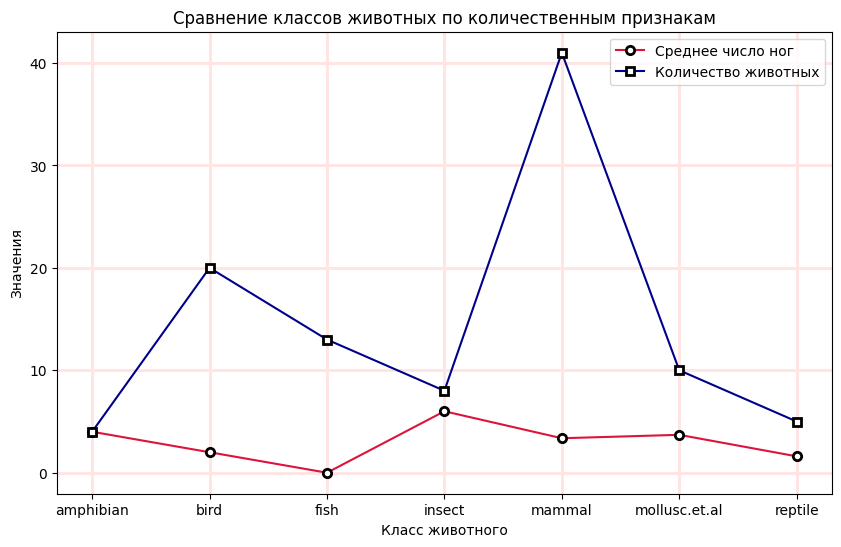

In [22]:
import matplotlib.pyplot as plt

class_stats = df.groupby('type').agg(
    avg_legs=('legs', 'mean')
).reset_index()

class_stats['count'] = df.groupby('type').size().values

plt.figure(figsize=(10,6))

plt.plot(
    class_stats['type'], class_stats['avg_legs'],
    marker='o', linestyle='-',
    color='crimson',
    markerfacecolor='white',
    markeredgecolor='black',
    markeredgewidth=2,
    label="Среднее число ног"
)

plt.plot(
    class_stats['type'], class_stats['count'],
    marker='s', linestyle='-',
    color='darkblue',
    markerfacecolor='white',
    markeredgecolor='black',
    markeredgewidth=2,
    label="Количество животных"
)

plt.grid(True, linewidth=2, color='mistyrose')

plt.xlabel("Класс животного")
plt.ylabel("Значения")
plt.title("Сравнение классов животных по количественным признакам")

plt.legend()
plt.show()

# Задание 6
Выполнить визуализацию многомерных данных, используя t-SNE.
Необходимо использовать набор данных MNIST или fashion MNIST
(можно использовать и другие готовые наборы данных, где можно
наблюдать разделение объектов по кластерам). Рассмотреть
результаты визуализации для разных значений перплексии.


In [23]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


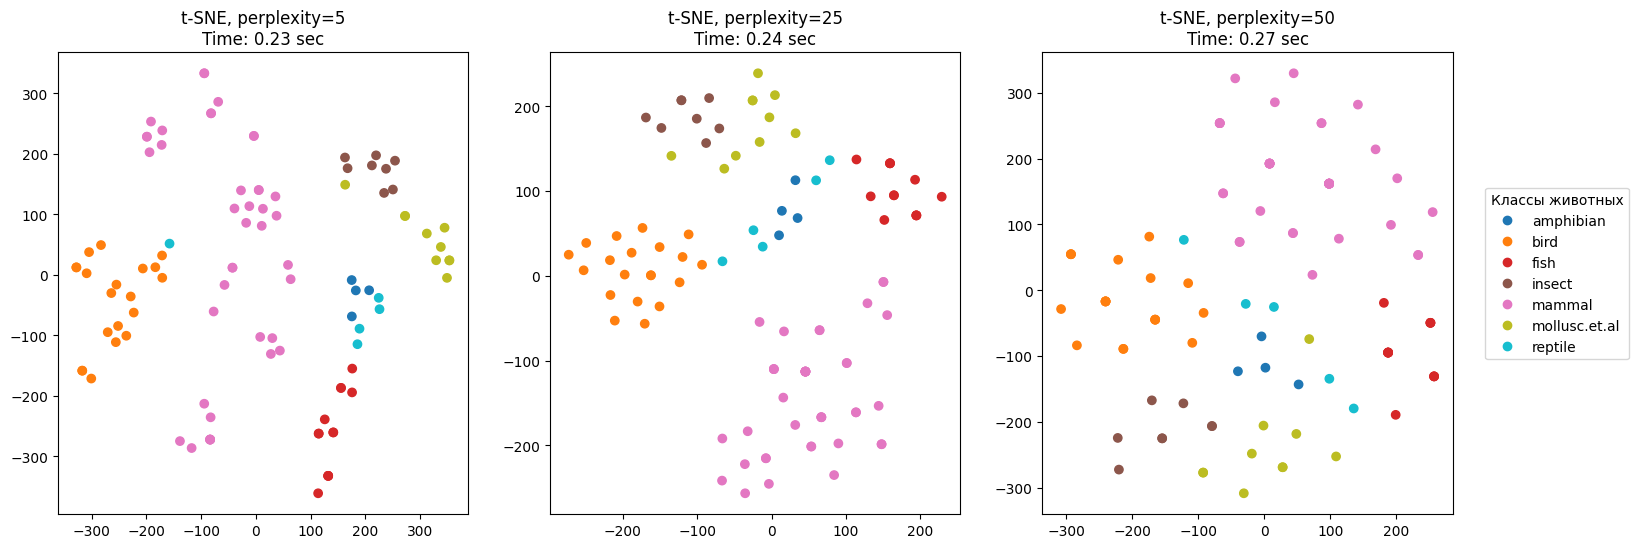

In [24]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import time

X = df.drop(columns=['type'])
X_scaled = StandardScaler().fit_transform(X)

labels = pd.Categorical(df['type'])
y = labels.codes
class_names = list(labels.categories)

perplexities = [5, 25, 50]
fig, axes = plt.subplots(1, 3, figsize=(18,6))

for i, perp in enumerate(perplexities):
    # Счёт времени для задания 7
    start = time.time()
    tsne = TSNE(n_components=2, perplexity=perp, random_state=42)
    X_embedded = tsne.fit_transform(X_scaled)
    elapsed = time.time() - start

    scatter = axes[i].scatter(X_embedded[:,0], X_embedded[:,1], c=y, cmap='tab10')
    axes[i].set_title(f"t-SNE, perplexity={perp}\nTime: {elapsed:.2f} sec")

fig.legend(handles=scatter.legend_elements()[0],
           labels=class_names,
           title="Классы животных",
           loc="center right")

plt.show()

# Задание 7
Выполнить визуализацию многомерных данных, используя UMAP с
различными параметрами n_neighbors и min_dist. Рассчитать время
работы алгоритма с помощью библиотеки time и сравнить его с
временем работы t-SNE.

In [25]:
!pip install umap-learn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\Rarmash\PyCharmMiscProject\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

C:\Users\Rarmash\PyCharmMiscProject\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

C:\Users\Rarmash\PyCharmMiscProject\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



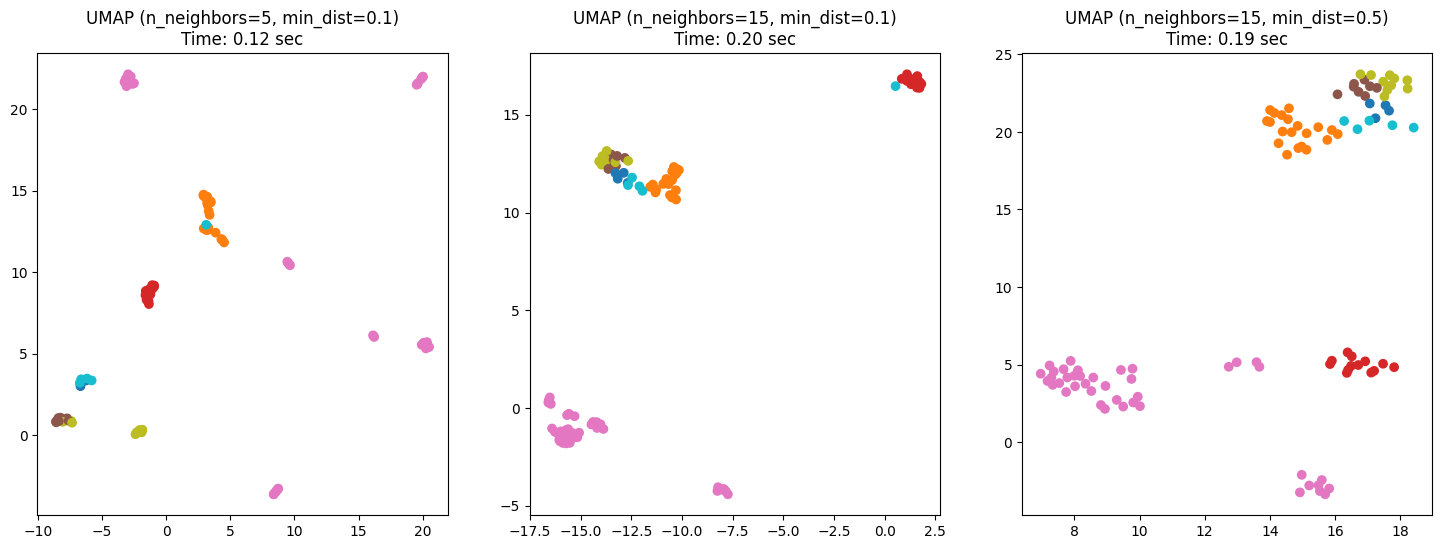

In [26]:
import umap
import time

labels = pd.Categorical(df['type'])
y = labels.codes

params = [(5, 0.1), (15, 0.1), (15, 0.5)]

fig, axes = plt.subplots(1, 3, figsize=(18,6))

for i, (n_neighbors, min_dist) in enumerate(params):
    start = time.time()
    reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=42)
    embedding = reducer.fit_transform(X_scaled)
    elapsed = time.time() - start

    axes[i].scatter(embedding[:,0], embedding[:,1], c=y, cmap='tab10')
    axes[i].set_title(f"UMAP (n_neighbors={n_neighbors}, min_dist={min_dist})\nTime: {elapsed:.2f} sec")

plt.show()